In [320]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [321]:
df= pd.read_csv('exchange_rate.csv')
df.head(5)

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [322]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')

In [323]:
df.head(5)

,date,Ex_rate
0,1990-01-01,0.7855
1,1990-01-02,0.7818
2,1990-01-03,0.7867
3,1990-01-04,0.7860
4,1990-01-05,0.7849


In [324]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     7588 non-null   datetime64[ns]
 1   Ex_rate  7588 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 118.7 KB


In [325]:
df.shape

(7588, 2)

In [326]:
df['Ex_rate'] = pd.to_numeric(df.Ex_rate)

In [327]:
df=df.sort_values('date',ascending=True)

In [328]:
df.Ex_rate.describe()

count    7588.000000
mean        0.776974
std         0.136620
min         0.483297
25%         0.701422
50%         0.761377
75%         0.873477
max         1.102536
Name: Ex_rate, dtype: float64

In [329]:
df.isnull().sum()

date       0
Ex_rate    0
dtype: int64

In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     7588 non-null   datetime64[ns]
 1   Ex_rate  7588 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 177.8 KB


In [331]:
df.duplicated().sum()

0

In [332]:
df.head()

,date,Ex_rate
0,1990-01-01,0.7855
1,1990-01-02,0.7818
2,1990-01-03,0.7867
3,1990-01-04,0.7860
4,1990-01-05,0.7849


In [333]:
df=df.set_index('date')

In [334]:
df.head()

,Ex_rate
date,
1990-01-01,0.7855
1990-01-02,0.7818
1990-01-03,0.7867
1990-01-04,0.7860
1990-01-05,0.7849


### Segregating Years, Months, Day

In [335]:
df['Year']=df.index.year
df['Month']=df.index.month
df['Day']=df.index.day

In [336]:
df.head()

,Ex_rate,Year,Month,Day
date,,,,
1990-01-01,0.7855,1990,1,1
1990-01-02,0.7818,1990,1,2
1990-01-03,0.7867,1990,1,3
1990-01-04,0.7860,1990,1,4
1990-01-05,0.7849,1990,1,5


In [337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7588 entries, 1990-01-01 to 2010-10-10
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ex_rate  7588 non-null   float64
 1   Year     7588 non-null   int64  
 2   Month    7588 non-null   int64  
 3   Day      7588 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 296.4 KB


## Visualization

Text(0.5, 0, 'Year')

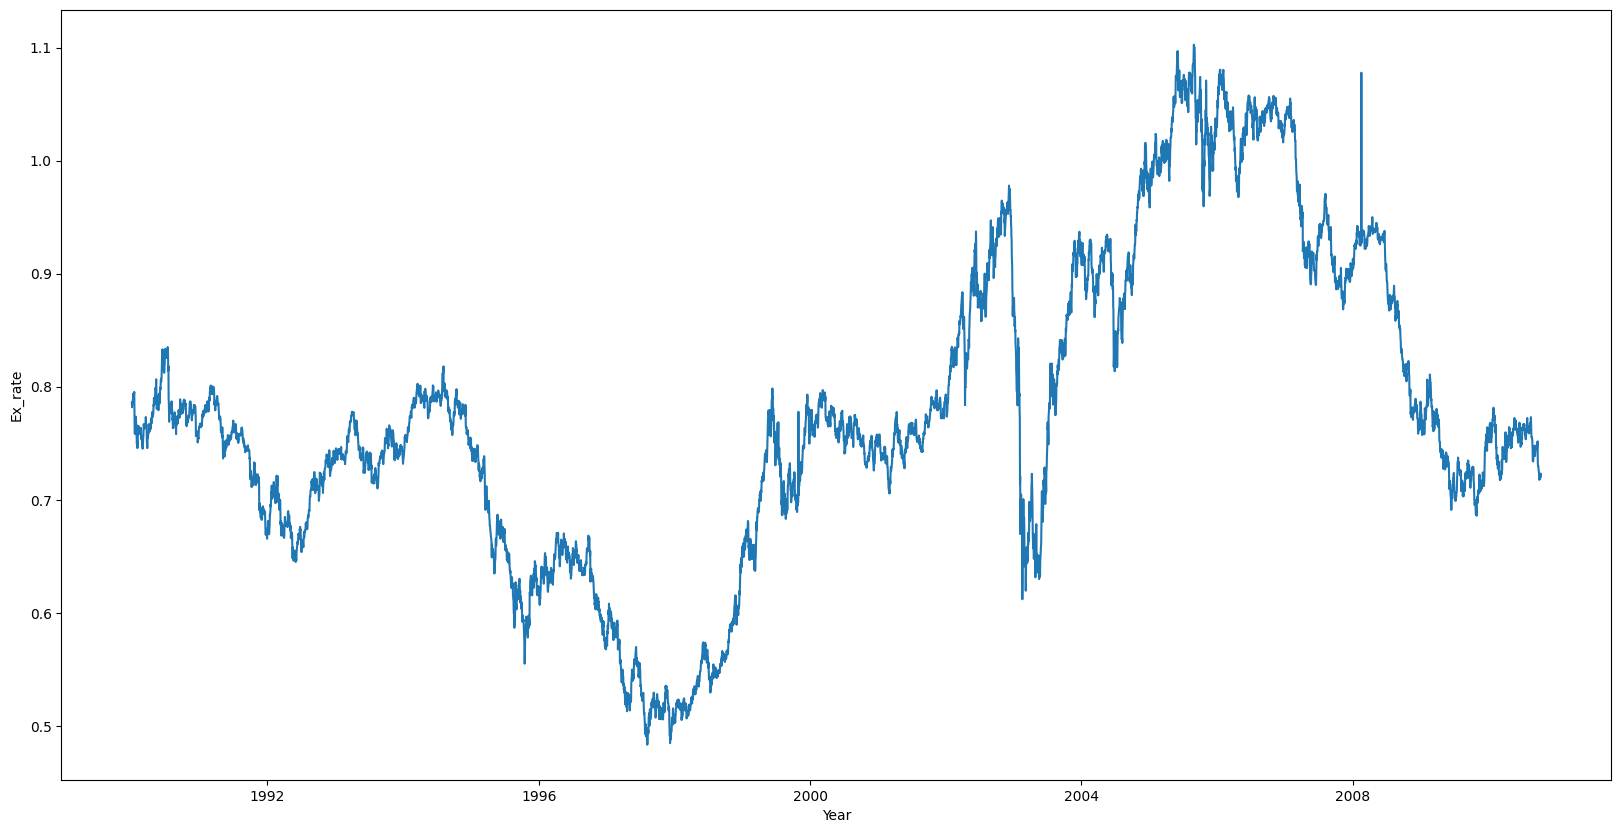

In [338]:
plt.figure(figsize =(20,10))
plt.plot(df['Ex_rate'])
plt.ylabel('Ex_rate')
plt.xlabel('Year')


## Line Plot on 10 years interval

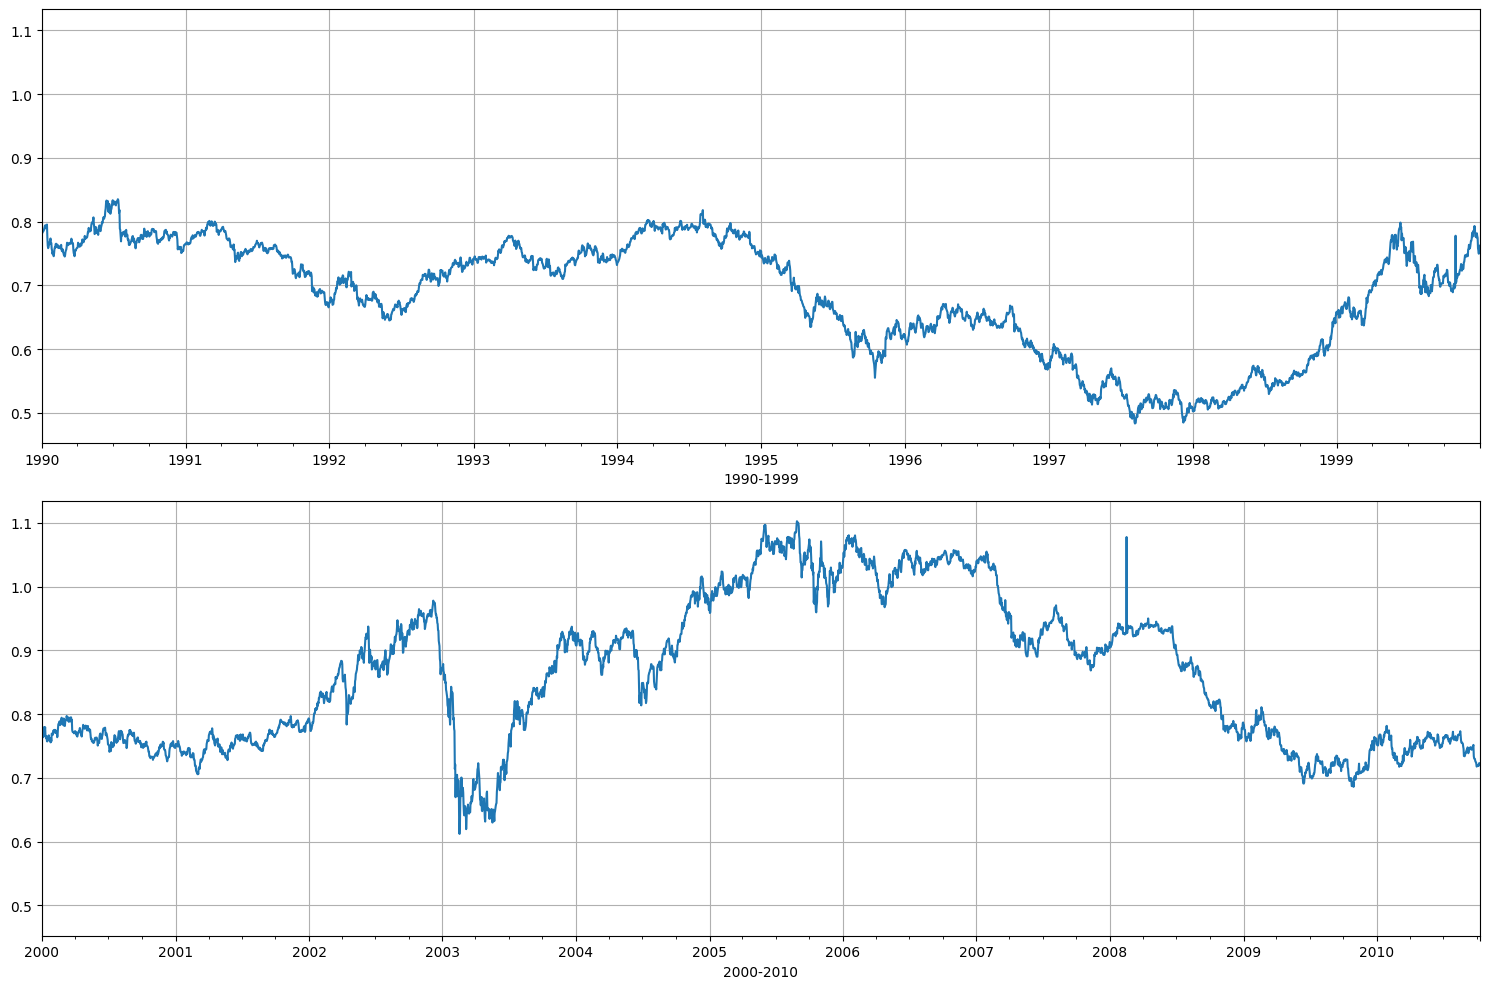

In [339]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10), sharey=True)
df.loc['1990':'1999']['Ex_rate'].plot(xlabel="1990-1999",
                                                stacked=True,
                                                ax=ax[0],
                                                grid=True)
df.loc['2000':'2010']['Ex_rate'].plot(xlabel="2000-2010",
                                                stacked=True,
                                                ax=ax[1],
                                                grid=True)
plt.tight_layout()
plt.show()

## Box plot

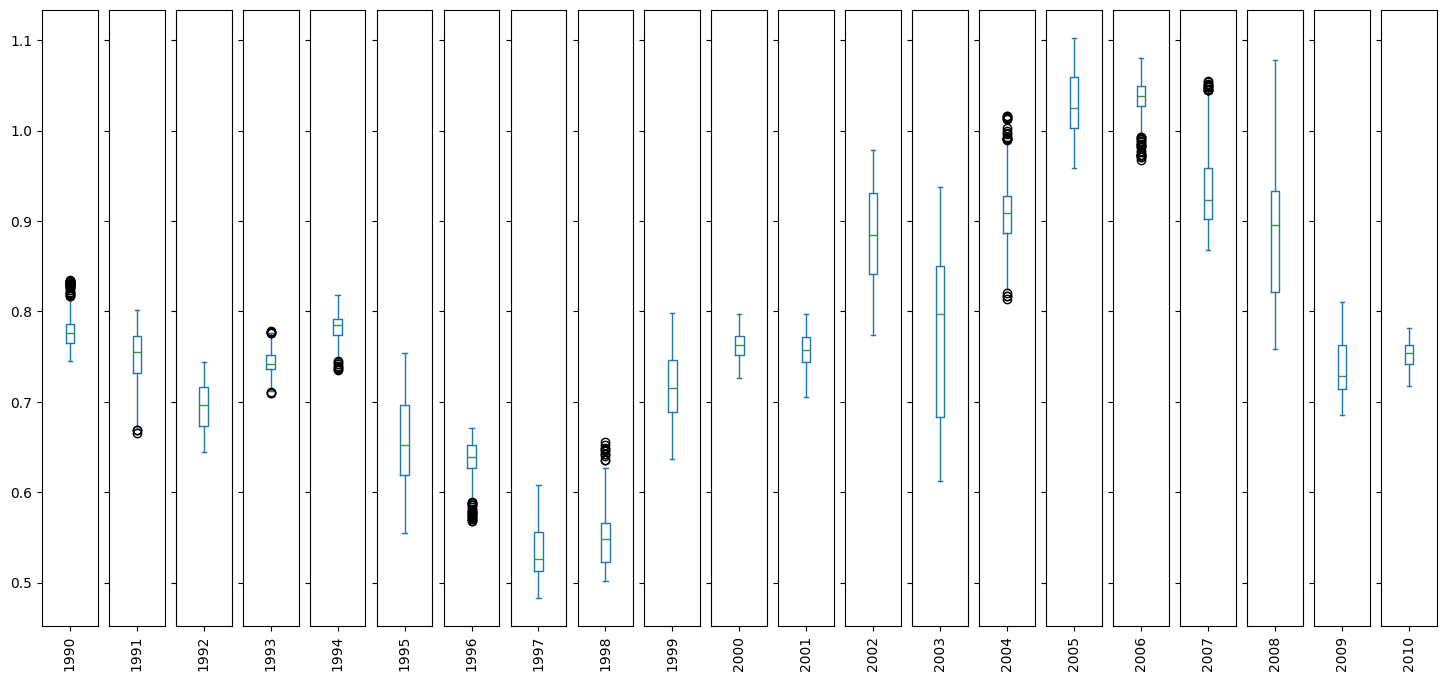

In [340]:
box1 = df.groupby('Year')

years = list(np.unique(df.Year))

fig, ax = plt.subplots(1, len(years), figsize=(18, 8), sharey=True)
for i, year in enumerate(years):
    X = box1.get_group(year)
    # subplots=True,layout=(1,len(A)),figsize=(18,8),use_index = True,
    X.plot(y='Ex_rate',
           kind='box',
           ax=ax[i],
           label=year,
           rot=90,
           sharey=True)
    plt.tight_layout
#plt.title('box plot');
plt.show()

##  Box Plot with 5 years interval

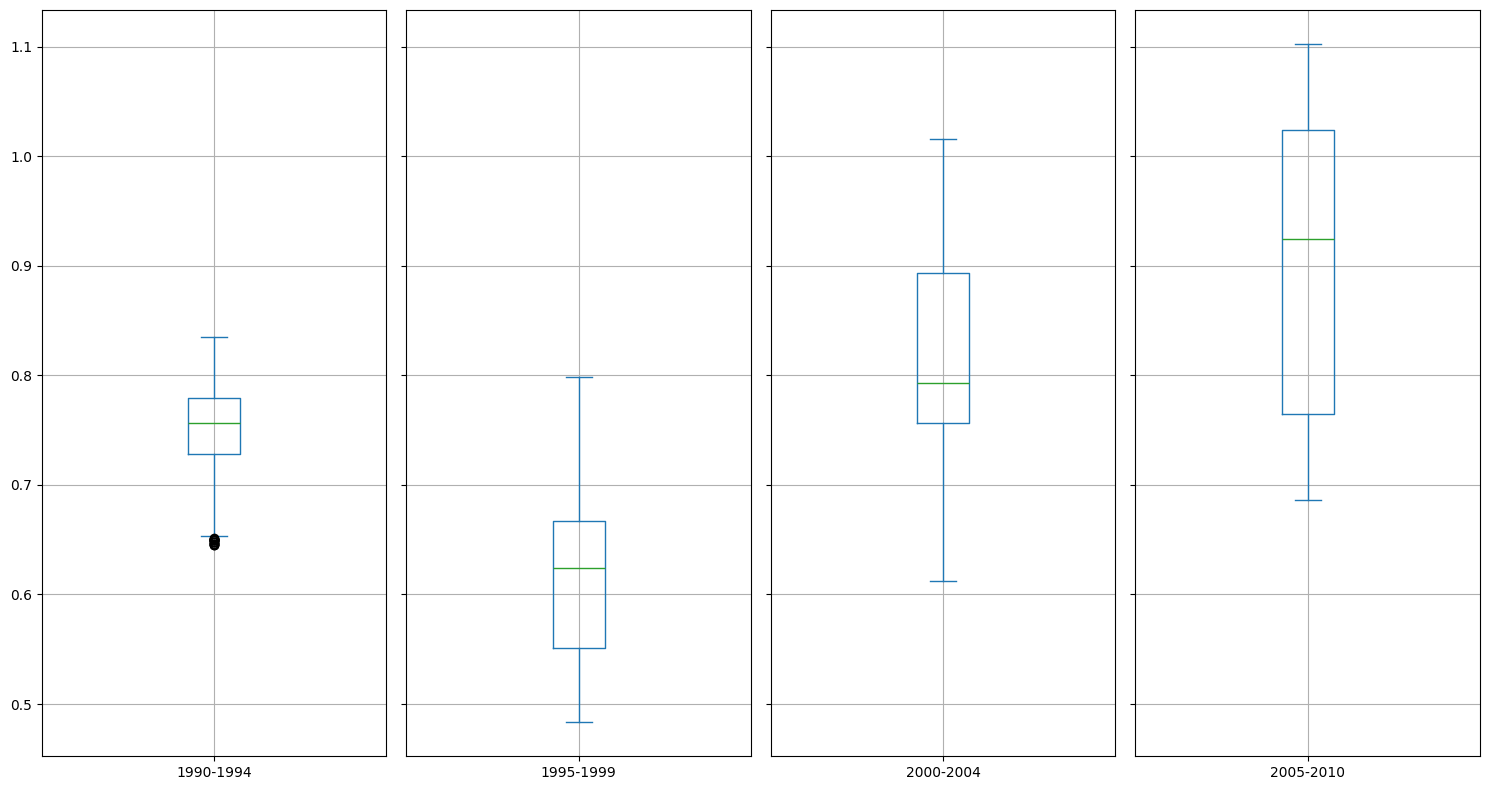

In [341]:
fig, ax = plt.subplots(1, 4, figsize=(15, 8), sharey=True)
df.loc['1990':'1994']['Ex_rate'].plot(kind='box',
                                                label="1990-1994",
                                                stacked=True,
                                                ax=ax[0],
                                                grid=True)
df.loc['1995':'1999']['Ex_rate'].plot(kind='box',
                                                label="1995-1999",
                                                stacked=True,
                                                ax=ax[1],
                                                grid=True)
df.loc['2000':'2004']['Ex_rate'].plot(kind='box',
                                                label="2000-2004",
                                                stacked=True,
                                                ax=ax[2],
                                                grid=True)
df.loc['2005':'2010']['Ex_rate'].plot(kind='box',
                                                label="2005-2010",
                                                stacked=True,
                                                ax=ax[3],
                                                grid=True)


plt.tight_layout()
plt.show()

In [342]:
df.drop(['Year','Month','Day'], axis=1, inplace=True)

## Stationarity

## Adf Test

In [349]:
df.tail(5)

,Ex_rate
date,
2010-10-06,0.718494
2010-10-07,0.721839
2010-10-08,0.723197
2010-10-09,0.720825
2010-10-10,0.720825


In [344]:
from statsmodels.tsa.stattools import adfuller,acf,pacf

In [350]:
#last 30 days data
days_30 = df.loc[df.index >= '2010-09-10']

result_one = adfuller((days_30.Ex_rate.values), autolag='AIC')
print(f'ADF Statistic: {result_one[0]}')
print(f'p-value: {result_one[1]}')
for key, value in result_one[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -0.7798221237473264
p-value: 0.8249774346314663
Critial Values:
   1%, -3.6699197407407405
Critial Values:
   5%, -2.9640707407407407
Critial Values:
   10%, -2.621171111111111


In [352]:
#last 6 month data
month_six = df.loc[df.index >= '2010-04-10']

result_six = adfuller((month_six.Ex_rate.values), autolag='AIC')
print(f'ADF Statistic: {result_six[0]}')
print(f'p-value: {result_six[1]}')
for key, value in result_six[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -1.190644196621614
p-value: 0.6776073379843537
Critial Values:
   1%, -3.466598080268425
Critial Values:
   5%, -2.8774669520682674
Critial Values:
   10%, -2.5752604356654425


In [390]:
#last 0ne_year data
one_year = df.loc[df.index >= '2009-10-10']

result_one_year = adfuller((one_year.Ex_rate.values), autolag='AIC')
print(f'ADF Statistic: {result_one_year[0]}')
print(f'p-value: {result_one_year[1]}')
for key, value in result_one_year[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -1.8064163417596688
p-value: 0.37728084327001415
Critial Values:
   1%, -3.4484434475193777
Critial Values:
   5%, -2.869513170510808
Critial Values:
   10%, -2.571017574266393


In [391]:
## last five year data
five_year = df.loc[df.index >= '2005-10-10']

result_five = adfuller((five_year.Ex_rate.values), autolag='AIC')
print(f'ADF Statistic: {result_five[0]}')
print(f'n_lags: {result_five[2]}')
print(f'p-value: {result_five[1]}')
for key, value in result_five[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -0.8050962496798665
n_lags: 2
p-value: 0.8176204972419279
Critial Values:
   1%, -3.433940201056092
Critial Values:
   5%, -2.8631258735235106
Critial Values:
   10%, -2.5676142653629


In [392]:
#last 10 year data
ten_year = df.loc[df.index >= '2000-10-10']

result_ten = adfuller((ten_year.Ex_rate.values), autolag='AIC')
print(f'ADF Statistic: {result_ten[0]}')
print(f'n_lags: {result_ten[2]}')
print(f'p-value: {result_ten[1]}')
for key, value in result_ten[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -1.519801017870858
n_lags: 1
p-value: 0.5236943118517605
Critial Values:
   1%, -3.4321423592450104
Critial Values:
   5%, -2.862331964581231
Critial Values:
   10%, -2.567191574740688


## P-value of ADF test

In [393]:
pval = [('30 days',result_one[0], result_one[1]),
          ('6 Months',result_six[0], result_six[1]),
          ('1 year',result_one_year[0], result_one_year[1]),
          ('5 years',result_five[0], result_five[1]),
          ('10 years',result_ten[0], result_ten[1])]

In [394]:
pval_df = pd.DataFrame(data = pval, columns = ['Time Series', 'ADF Stats', 'P Value'])
pval_df

,Time Series,ADF Stats,P Value
0,30 days,-0.779822,0.824977
1,6 Months,-1.190644,0.677607
2,1 year,-1.806416,0.377281
3,5 years,-0.805096,0.817620
4,10 years,-1.519801,0.523694


## Differentation of time series using ADF Test

In [395]:
#30 days
days_30_diff = days_30.diff().dropna()

#six month
month_six_diff = month_six.diff().dropna()

#1 year
one_year_diff = one_year.diff().dropna()

#5 years
five_year_diff = five_year.diff().dropna()

#10 years
ten_year_diff = ten_year.diff().dropna()

In [396]:
#30 days data
result_one_diff = adfuller((days_30_diff.Ex_rate.values), autolag='AIC')
print(f'ADF Statistic: {result_one_diff[0]}')
print(f'n_lags: {result_one_diff[2]}')
print(f'p-value: {result_one_diff[1]}')
for key, value in result_one_diff[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -5.13905714044806
n_lags: 0
p-value: 1.1693483567690025e-05
Critial Values:
   1%, -3.6790595944893187
Critial Values:
   5%, -2.9678817237279103
Critial Values:
   10%, -2.6231583472057074


In [397]:
#Six Months
result_six_diff = adfuller((month_six_diff.Ex_rate.values), autolag='AIC')
print(f'ADF Statistic: {result_six_diff[0]}')
print(f'n_lags: {result_six_diff[2]}')
print(f'p-value: {result_six_diff[1]}')
for key, value in result_six_diff[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -14.288822989476358
n_lags: 0
p-value: 1.2860387053656034e-26
Critial Values:
   1%, -3.4668001583460613
Critial Values:
   5%, -2.8775552336674317
Critial Values:
   10%, -2.5753075498128246


In [398]:
# last 1 year data
result_one_year_diff = adfuller((one_year_diff.Ex_rate.values), autolag='AIC')
print(f'ADF Statistic: {result_one_year_diff[0]}')
print(f'n_lags: {result_one_year_diff[2]}')
print(f'p-value: {result_one_year_diff[1]}')
for key, value in result_one_year_diff[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -20.98592089257361
n_lags: 0
p-value: 0.0
Critial Values:
   1%, -3.4484434475193777
Critial Values:
   5%, -2.869513170510808
Critial Values:
   10%, -2.571017574266393


In [399]:
#last 5 year data
result_five_diff = adfuller((five_year_diff.Ex_rate.values), autolag='AIC')
print(f'ADF Statistic: {result_five_diff[0]}')
print(f'n_lags: {result_five_diff[2]}')
print(f'p-value: {result_five_diff[1]}')
for key, value in result_five_diff[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -36.694740517453916
n_lags: 1
p-value: 0.0
Critial Values:
   1%, -3.433940201056092
Critial Values:
   5%, -2.8631258735235106
Critial Values:
   10%, -2.5676142653629


In [400]:
#last 10 years data
result_ten_diff = adfuller((ten_year_diff.Ex_rate.values), autolag='AIC')
print(f'ADF Statistic: {result_ten_diff[0]}')
print(f'n_lags: {result_ten_diff[2]}')
print(f'p-value: {result_ten_diff[1]}')
for key, value in result_ten_diff[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -70.47669820333799
n_lags: 0
p-value: 0.0
Critial Values:
   1%, -3.4321423592450104
Critial Values:
   5%, -2.862331964581231
Critial Values:
   10%, -2.567191574740688


In [401]:
pval_diff = [('30 days',result_one_diff[0], result_one_diff[1]),
              ('6 Months',result_six_diff[0], result_six_diff[1]),
              ('1 year',result_one_year_diff[0], result_one_year_diff[1]),
              ('5 years',result_five_diff[0], result_five_diff[1]),
              ('10 years',result_ten_diff[0], result_ten_diff[1])]

## P-values on ADF tests on Differentation

In [402]:
pval_df_diff = pd.DataFrame(data = pval_diff, columns = ['Time Series on Differeation', 'ADF Stats', 'P Value'])
pval_df_diff

,Time Series on Differeation,ADF Stats,P Value
0,30 days,-5.139057,1.169348e-05
1,6 Months,-14.288823,1.286039e-26
2,1 year,-20.985921,0.000000e+00
3,5 years,-36.694741,0.000000e+00
4,10 years,-70.476698,0.000000e+00


## ADF test on Log function

In [403]:
#30 days

days_30_log = np.log(days_30)

#six month

month_six_log = np.log(month_six)

#1 year

one_year_log = np.log(one_year)

#5 years

five_year_log = np.log(five_year)

#10 years

ten_year_log = np.log(ten_year)

#Entire Data
data_log = np.log(df)

In [404]:
#30 days
result_days_30_log = adfuller((days_30_log.Ex_rate.values), autolag='AIC')
print(f'ADF Statistic: {result_days_30_log[0]}')
print(f'n_lags: {result_days_30_log[2]}')
print(f'p-value: {result_days_30_log[1]}')
for key, value in result_days_30_log[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -0.772354022202829
n_lags: 0
p-value: 0.8271083022542263
Critial Values:
   1%, -3.6699197407407405
Critial Values:
   5%, -2.9640707407407407
Critial Values:
   10%, -2.621171111111111


In [405]:
#Six month
result_month_six_log = adfuller((month_six_log.Ex_rate.values), autolag='AIC')
print(f'ADF Statistic: {result_month_six_log[0]}')
print(f'n_lags: {result_month_six_log[2]}')
print(f'p-value: {result_month_six_log[1]}')
for key, value in result_month_six_log[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -1.1444596291881666
n_lags: 0
p-value: 0.6970203763721757
Critial Values:
   1%, -3.466598080268425
Critial Values:
   5%, -2.8774669520682674
Critial Values:
   10%, -2.5752604356654425


In [406]:
#1 year
result_one_year_log = adfuller((one_year_log.Ex_rate.values), autolag='AIC')
print(f'ADF Statistic: {result_one_year_log[0]}')
print(f'n_lags: {result_one_year_log[2]}')
print(f'p-value: {result_one_year_log[1]}')
for key, value in result_one_year_log[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -1.7900413219259037
n_lags: 1
p-value: 0.3854169894028934
Critial Values:
   1%, -3.4484434475193777
Critial Values:
   5%, -2.869513170510808
Critial Values:
   10%, -2.571017574266393


In [407]:
#5 years
result_five_year_log = adfuller((five_year_log.Ex_rate.values), autolag='AIC')
print(f'ADF Statistic: {result_five_year_log[0]}')
print(f'n_lags: {result_five_year_log[2]}')
print(f'p-value: {result_five_year_log[1]}')
for key, value in result_five_year_log[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -0.726027175634278
n_lags: 2
p-value: 0.8398922471749262
Critial Values:
   1%, -3.433940201056092
Critial Values:
   5%, -2.8631258735235106
Critial Values:
   10%, -2.5676142653629


In [408]:
#10 years
result_ten_year_log = adfuller((ten_year_log.Ex_rate.values), autolag='AIC')
print(f'ADF Statistic: {result_ten_year_log[0]}')
print(f'n_lags: {result_ten_year_log[2]}')
print(f'p-value: {result_ten_year_log[1]}')
for key, value in result_ten_year_log[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -1.6919671241697296
n_lags: 12
p-value: 0.43525593627462333
Critial Values:
   1%, -3.4321477795421935
Critial Values:
   5%, -2.8623343588485692
Critial Values:
   10%, -2.5671928493690377


In [409]:
#Entire Data
result_data_log = adfuller((data_log.Ex_rate.values), autolag='AIC')
print(f'ADF Statistic: {result_data_log[0]}')
print(f'n_lags: {result_data_log[2]}')
print(f'p-value: {result_data_log[1]}')
for key, value in result_data_log[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -1.8025302903398492
n_lags: 29
p-value: 0.37920620027850693
Critial Values:
   1%, -3.4312155097047468
Critial Values:
   5%, -2.8619224901960907
Critial Values:
   10%, -2.5669735950858916


In [410]:
pval_log = [('30 days',result_days_30_log[0], result_days_30_log[1]),
          ('6 Months',result_month_six_log[0], result_month_six_log[1]),
          ('1 year',result_one_year_log[0], result_one_year_log[1]),
          ('5 years',result_five_diff[0], result_five_diff[1]),
          ('10 years',result_ten_year_log[0], result_ten_year_log[1]),
            ('Entire Data',result_data_log[0], result_data_log[1])]

In [411]:
pval_df_log = pd.DataFrame(data = pval_log, columns = ['Time Series on Log Function', 'ADF Stats', 'P Value'])
pval_df_log

,Time Series on Log Function,ADF Stats,P Value
0,30 days,-0.772354,0.827108
1,6 Months,-1.144460,0.697020
2,1 year,-1.790041,0.385417
3,5 years,-36.694741,0.000000
4,10 years,-1.691967,0.435256
5,Entire Data,-1.802530,0.379206


## Splitting the data

In [412]:
df_year = one_year.copy()

In [413]:
df_year.head()

,Ex_rate
date,
2009-10-10,0.728491
2009-10-11,0.728491
2009-10-12,0.728491
2009-10-13,0.716281
2009-10-14,0.714847


In [414]:
df_year.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2009-10-10 to 2010-10-10
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ex_rate  366 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [429]:
split_point = round(len(df_year)*(3/4))
df_train = df_year[:split_point]
len_train = len(df_train)
df_test = df_year[split_point:]
len_test = len(df_test)
print('The first day of the Training dataset is '+str(df_train.index[0].date()))
print('The last day of the Training dataset is '+str(df_train.index[-1].date()))
print('The first day of the Testing dataset is '+str(df_test.index[0].date()))
print('The last day of the Testing dataset is '+str(df_test.index[-1].date()))

The first day of the Training dataset is 2009-10-10
The last day of the Training dataset is 2010-07-10
The first day of the Testing dataset is 2010-07-11
The last day of the Testing dataset is 2010-10-10


## Visualization of train and test

In [455]:
import warnings
warnings.filterwarnings('ignore')

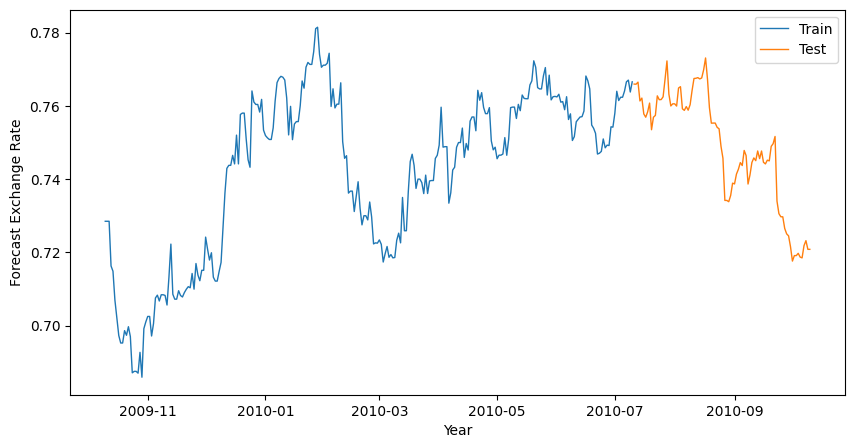

In [454]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)

ax.plot(df_train.index, df_train['Ex_rate'], linewidth=1, label='Train')
ax.plot(df_test.index, df_test['Ex_rate'], linewidth=1, label='Test')

ax.set_ylabel('Forecast Exchange Rate')
ax.set_xlabel('Year')
ax.legend()

plt.show()


## acf and pacf

In [494]:
from statsmodels.tsa.arima.model import ARIMA
from math import sqrt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error,mean_absolute_error

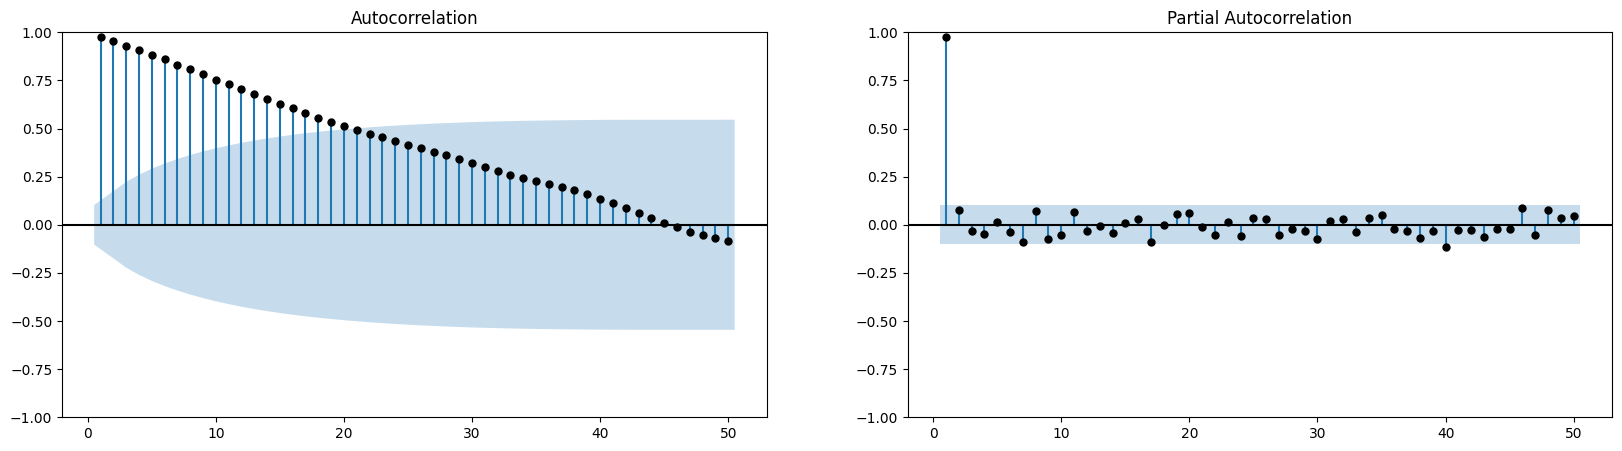

In [484]:
# make figure
fig, ax = plt.subplots(1,2,figsize=(20,5))

# make ACF plot
plot_acf(df_year, lags=50, zero=False, ax=ax[0],color="black");

#make PACF plot
plot_pacf(df_year, lags=50, zero=False, ax=ax[1],color="black");

In [491]:
training_data = df_train['Ex_rate'].values
testing_data =  df_test['Ex_rate'].values

hist = [x for x in training_data]
model_predictions = []
for t in range(len(testing_data)):
    model = ARIMA(hist, order = (0,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    test_value = testing_data[t]
    hist.append(test_value)
rmse = sqrt(mean_squared_error(testing_data, model_predictions))
print("ROOT MEAN SQUARED ERROR is {}".format(rmse))

ROOT MEAN SQUARED ERROR is 0.0036635015502515713


## Visualization

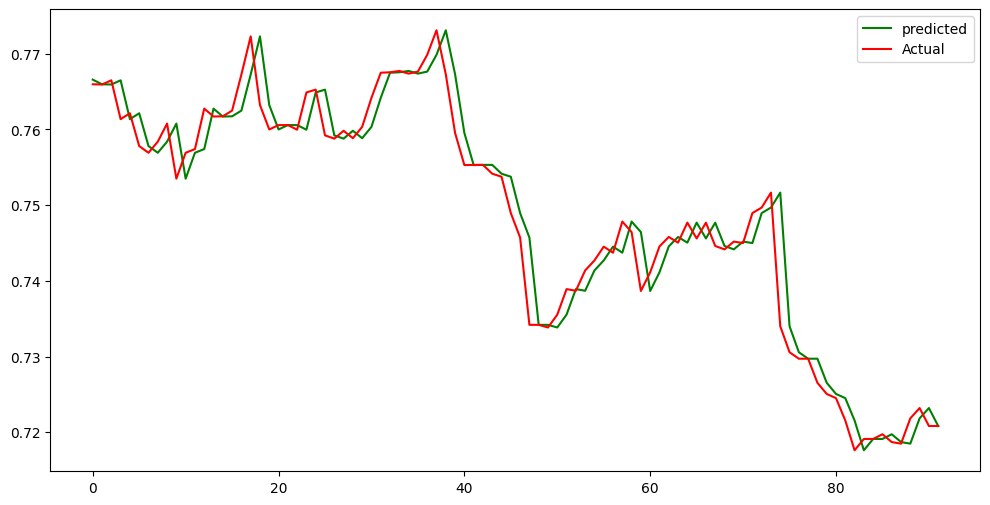

In [488]:
plt.figure(figsize=(12,6))
plt.plot(model_predictions,label='predicted',color='g')
plt.plot(testing_data,label='Actual',color='r')
plt.legend()

In [495]:
mape = mean_absolute_error(model_predictions,testing_data)*100
print('MAPE:',mape)

MAPE: 0.2409717391304345


## Prediction

In [538]:
#Arima Model
model_arm = ARIMA(df_year, order=(0,1,0))
model_fit_arm = model_arm.fit()

In [539]:
arima_pred = model_fit_arm.forecast(steps = 30)
arima_pred1

,predicted_mean
2010-10-11,0.720825
2010-10-12,0.720825
2010-10-13,0.720825
2010-10-14,0.720825
2010-10-15,0.720825
2010-10-16,0.720825
2010-10-17,0.720825
2010-10-18,0.720825
2010-10-19,0.720825
2010-10-20,0.720825


## one step forecasting

In [542]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [543]:
model_osa=SARIMAX(df, order=(0,1,0), trend="c")
results_osa = model_osa.fit()
#assign residuals to variable
resid_osa = results_osa.resid

In [544]:
print(results_osa.summary())

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:               SARIMAX(0, 1, 0)   Log Likelihood               27988.105
Date:                Tue, 03 Sep 2024   AIC                         -55972.211
Time:                        19:20:01   BIC                         -55958.342
Sample:                    01-01-1990   HQIC                        -55967.451
                         - 10-10-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -8.524e-06   6.95e-05     -0.123      0.902      -0.000       0.000
sigma2      3.659e-05   7.78e-08    470.048      0.000    3.64e-05    3.67e-05
Ljung-Box (L1) (Q):                 131.05   Jarque-

In [546]:
forecast_osa = results_osa.get_prediction(start=-len_test, end=df.index[-1])
#forecast mean
mean_forecast_osa = forecast_osa.predicted_mean
#get a confidence interval of forecasts
confidence_intervals_osa = forecast_osa.conf_int()

## Visualization

In [547]:
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

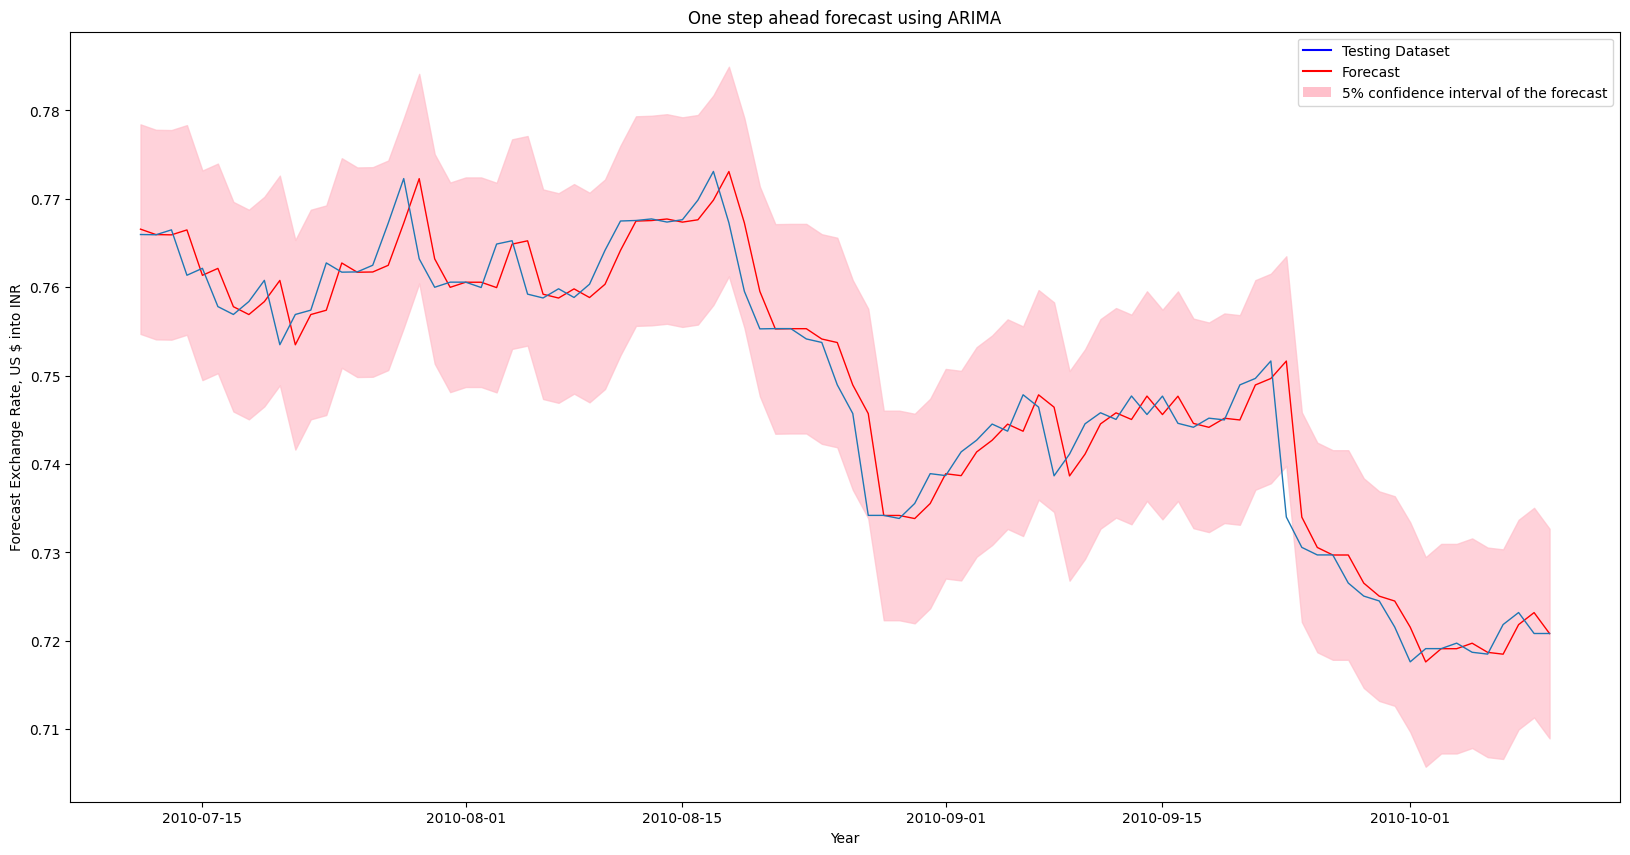

In [562]:
plt.figure(figsize=(20,10))
plt.plot(mean_forecast_osa.index, mean_forecast_osa, color='r', label='Forecast', linewidth=1)
plt.plot(df_test, label='Testing dataset', linewidth=1)
plt.xlabel('Year')
plt.ylabel('Forecast Exchange Rate, US \$ into INR')
plt.title('One step ahead forecast using ARIMA')
plt.fill_between(mean_forecast_osa.index, confidence_intervals_osa['lower Ex_rate'], confidence_intervals_osa['upper Ex_rate'], color='pink', alpha=0.7)
legend_elements = [Line2D(df_test.index, df_test.values, color='b', label='Testing Dataset'),
                   Line2D(mean_forecast_osa.index, mean_forecast_osa, color='r', label='Forecast'),
                   Patch(facecolor='pink', label='5% confidence interval of the forecast')]
plt.legend(handles=legend_elements)

plt.show()

## Dynamic forest

In [556]:
#fit the model
training_model=SARIMAX(df_train, order=(0,1,0), trend='c', dynamic=True)
training_results = training_model.fit()
#assign residuals to variable
training_resid = training_results.resid

In [557]:
print(training_results.summary())

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                  274
Model:               SARIMAX(0, 1, 0)   Log Likelihood                1063.575
Date:                Tue, 03 Sep 2024   AIC                          -2123.150
Time:                        19:29:26   BIC                          -2115.931
Sample:                    10-10-2009   HQIC                         -2120.252
                         - 07-10-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0001      0.000      0.468      0.640      -0.000       0.001
sigma2      2.419e-05    1.5e-06     16.116      0.000    2.12e-05    2.71e-05
Ljung-Box (L1) (Q):                   5.11   Jarque-

In [558]:
insample_forecast = training_results.get_prediction(start = df_train.index[-1], end=df_test.index[-1])
mean_insample_forecast = insample_forecast.predicted_mean
insample_confidence_intervals = insample_forecast.conf_int()

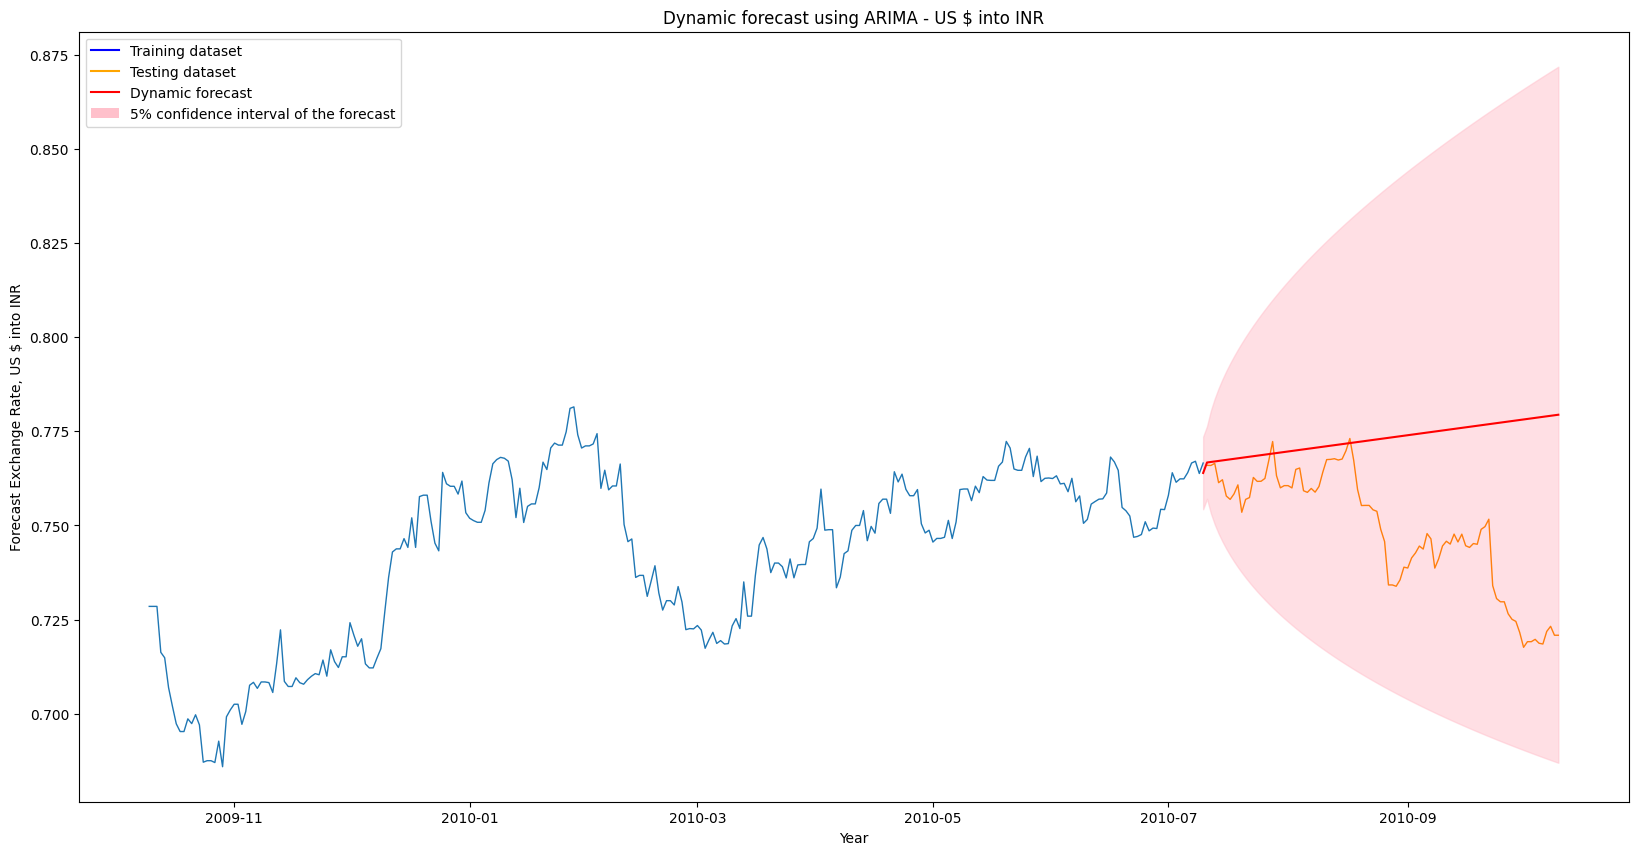

In [561]:
plt.figure(figsize=(20,10))
plt.plot(df_train, linewidth=1)
plt.plot(df_test, linewidth=1)
plt.plot(mean_insample_forecast.index, mean_insample_forecast, color='r', label='forecast')
plt.xlabel('Year')
plt.ylabel('Forecast Exchange Rate, US \$ into INR')
plt.title('Dynamic forecast using ARIMA - US \$ into INR')
plt.fill_between(mean_insample_forecast.index, insample_confidence_intervals['lower Ex_rate'], insample_confidence_intervals['upper Ex_rate'], color='pink', alpha=0.5)

legend_elements_2 = [Line2D(df_train.index, df_train, color='blue', label='Training dataset'),
                   Line2D(df_test.index, df_test, color='orange', label='Testing dataset'),
                   Line2D(mean_insample_forecast.index, mean_insample_forecast, color='r', label='Dynamic forecast'),
                   Patch(facecolor='pink', label='5% confidence interval of the forecast')]
plt.legend(handles=legend_elements_2)

plt.show()